# Preamble

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
import pickle
from matplotlib.colors import BoundaryNorm
import glob
import pdb
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

import calendar
import sys
from importlib import reload
sys.path.append('/home/563/ab2313/MJO/functions')

In [2]:
import access_heatmaps_corr as heat_corr

In [3]:
data_dir = '/g/data/w40/ab2313/pattern_correlations/'

In [4]:
q = 'all'
int_corr = xr.open_dataset(data_dir + 'int_pattern_correlation.nc')
count_corr = xr.open_dataset(data_dir + 'count_pattern_correlation.nc')
sum_corr = xr.open_dataset(data_dir + 'sum_pattern_correlation.nc')

sum_corr

<xarray.Dataset>
Dimensions:      (month: 6, phase: 4, state: 4)
Coordinates:
  * phase        (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * month        (month) int64 10 11 12 1 2 3
  * state        (state) object 'All' 'WA' 'NT' 'QLD'
Data variables:
    correlation  (month, phase, state) float64 ...
    pval         (month, phase, state) float64 ...

In [42]:
int_corr = xr.open_dataset(data_dir + 'int_pattern_correlation_90.nc')
count_corr = xr.open_dataset(data_dir + 'count_pattern_correlation_90.nc')
sum_corr = xr.open_dataset(data_dir + 'sum_pattern_correlation_90.nc')
q = 90
sum_corr

<xarray.Dataset>
Dimensions:      (month: 6, phase: 4, state: 4)
Coordinates:
  * phase        (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * month        (month) int64 10 11 12 1 2 3
  * state        (state) object 'All' 'WA' 'NT' 'QLD'
Data variables:
    correlation  (month, phase, state) float64 ...
    pval         (month, phase, state) float64 ...

In [5]:
savedir = '../images/access/pattern_correlation/'

# Single Ind

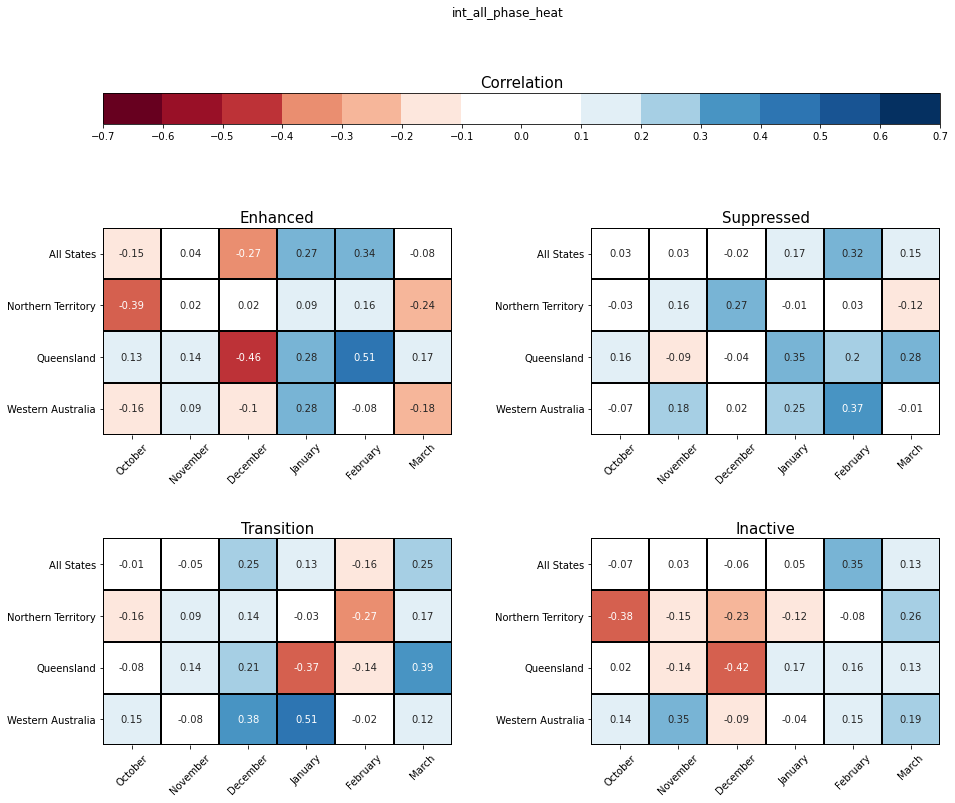

In [50]:
heat_corr = reload(heat_corr)
heat_corr.corr_heatmap_phase_group(int_corr.correlation.transpose(), month_reverse = 0
                 , vmax = 0.7,step = 0.1, add_white = 1,
                 savename = f'int_{q}_phase_heat', savedir = savedir)

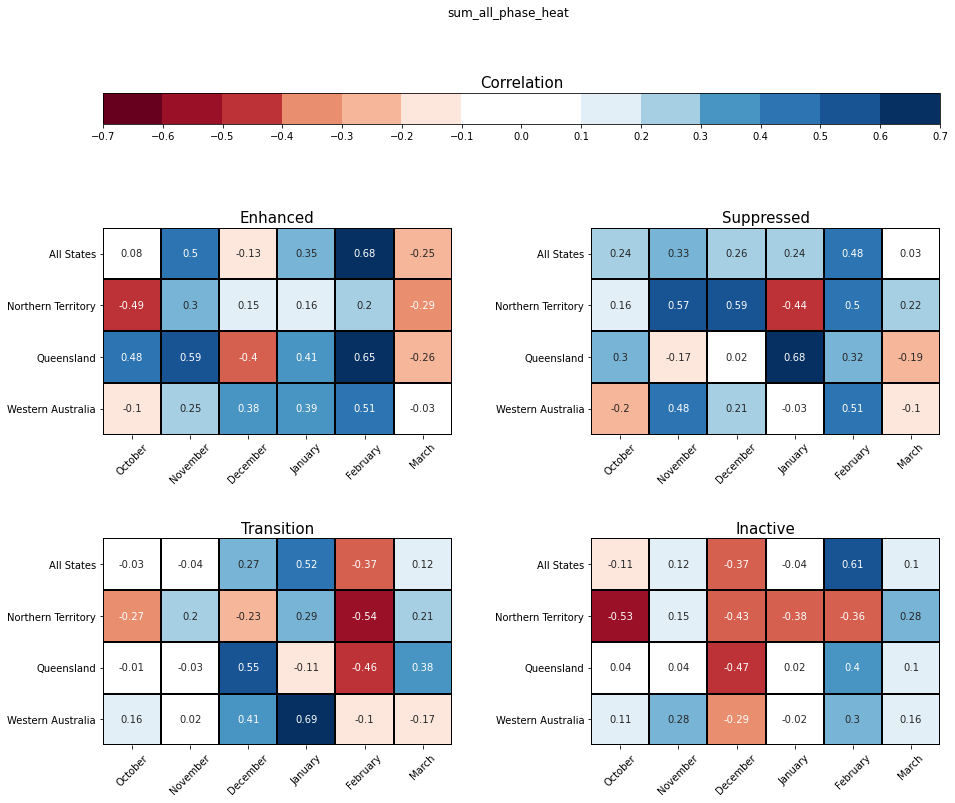

In [51]:
heat_corr = reload(heat_corr)
heat_corr.corr_heatmap_phase_group(sum_corr.correlation.transpose(), month_reverse = 0
                 , vmax = 0.7,step = 0.1, add_white = 1,
                 savename = f'sum_{q}_phase_heat', savedir = savedir)

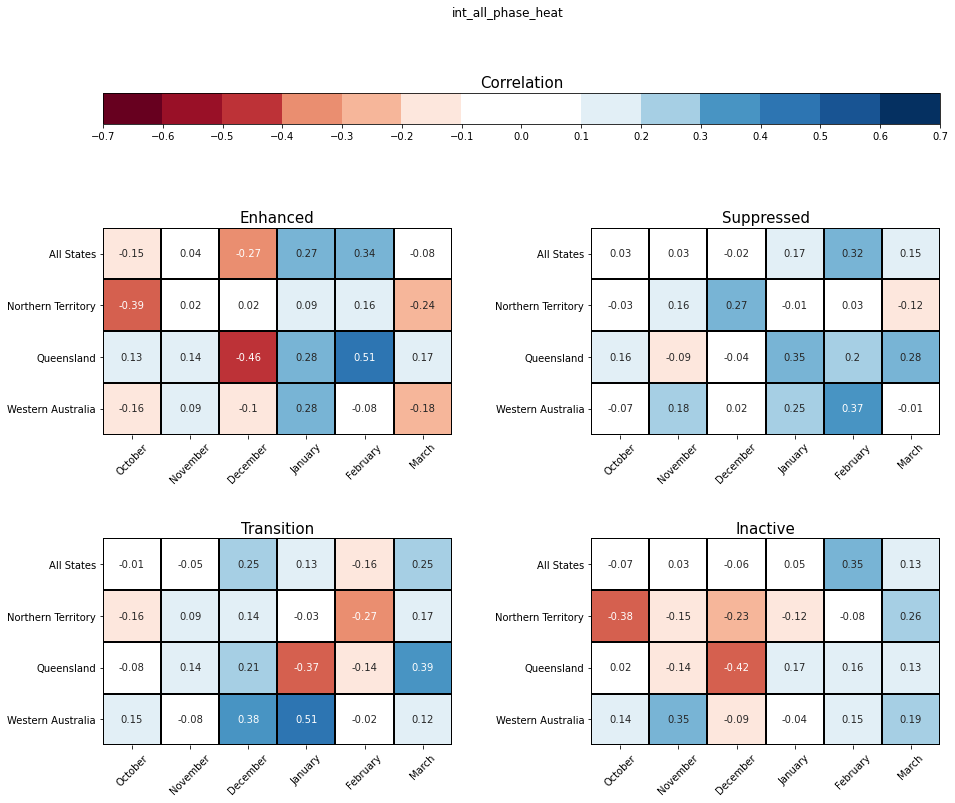

In [52]:
heat_corr = reload(heat_corr)
heat_corr.corr_heatmap_phase_group(int_corr.correlation.transpose(), month_reverse = 0
                 , vmax = 0.7,step = 0.1, add_white = 1,
                 savename = f'int_{q}_phase_heat', savedir = savedir)

# Legion Heatmaps

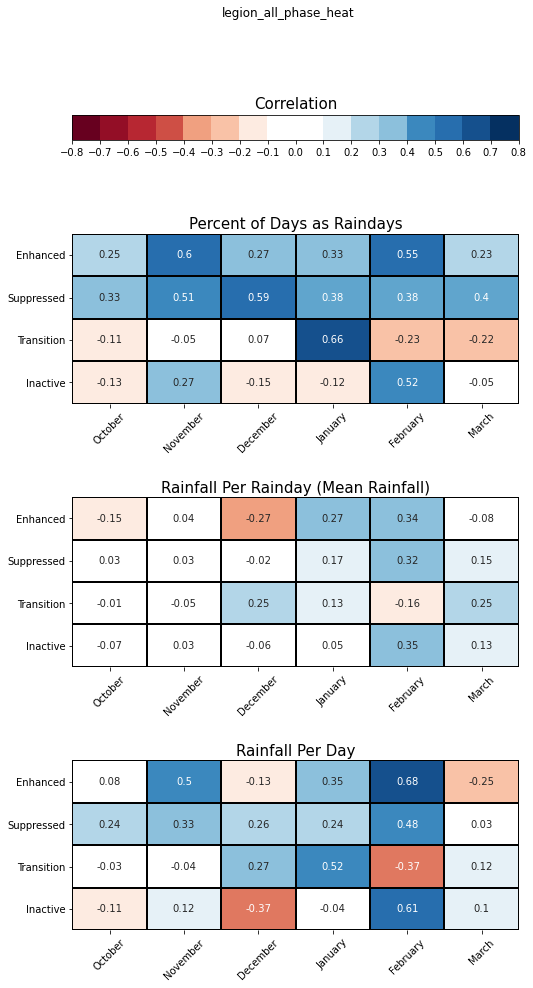

In [53]:
heat_corr = reload(heat_corr)
data_tot = [count_corr.sel(state = 'All').correlation.transpose(),
            int_corr.sel(state = 'All').correlation.transpose(),
            sum_corr.sel(state = 'All').correlation.transpose()]

titles = ['Percent of Days as Raindays', 'Rainfall Per Rainday (Mean Rainfall)','Rainfall Per Day']
heat_corr.corr_heatmap_multi_index(data_tot, titles = titles, month_reverse = 0
                 , vmax = 0.8,step = 0.1, add_white = 1
                 ,savename = f'legion_{q}_phase_heat', savedir = savedir)